
# Customer Segmentation Analysis Notebook

This notebook replicates the visualizations from the Dram Shop Customer Segmentation presentation. 
Each section includes code to generate the corresponding graph, as well as space for notes and insights.

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('data/updated_customer_summary.csv')


In [2]:
# a function to create plots

def plot_with_custom_style(data, categorical_var, dependent_var, title, order=None, plot_type="bar", 
                           stacked=False, orientation="vertical", hue=None):
    """
    Creates a customized bar, count, stacked, or horizontal plot with a consistent styling format.
    
    Parameters:
    - data (DataFrame): The dataset containing the variables to plot.
    - categorical_var (str): The name of the categorical variable.
    - dependent_var (str): The name of the dependent variable, shown as percentages if set to "proportion".
    - title (str): The title of the plot, aligned to the left.
    - order (list, optional): Specific order for the categorical variable.
    - plot_type (str, optional): Type of plot to create. Options are "bar" for bar plot and "count" for count plot. Default is "bar".
    - stacked (bool, optional): If True, creates a stacked bar chart. Only applicable for `plot_type="bar"` and requires `hue`.
    - orientation (str, optional): Orientation of the bars, either "vertical" or "horizontal". Default is "vertical".
    - hue (str, optional): Variable name in `data` for color segmentation (used for stacked or grouped bars).
    
    Usage Example:
    ```python
    plot_with_custom_style(data, categorical_var='customer_segment', 
                           dependent_var='average_tip', title='Average Tip by Customer Segment', orientation='horizontal')
    ```
    """
    plt.figure(figsize=(10, 6))
    sns.set_style("darkgrid", {"axes.facecolor": "#212121", "grid.color": "gray"})
    sns.set_context("talk")
    
    # Adjust orientation of the plot
    x, y = (categorical_var, dependent_var) if orientation == "vertical" else (dependent_var, categorical_var)
    
    # Plot selection
    if plot_type == "bar":
        if stacked and hue:  # Stacked bar plot
            # Pivot data for stacked bar plot
            pivot_data = data.pivot_table(index=categorical_var, columns=hue, values=dependent_var, aggfunc='sum').fillna(0)
            pivot_data.plot(kind='bar', stacked=True, color=sns.color_palette("coolwarm", len(pivot_data.columns)), figsize=(10, 6))
            plt.legend(title=hue)
        else:  # Regular bar plot (vertical or horizontal)
            sns.barplot(x=x, y=y, data=data, order=order, hue=hue, color="steelblue" if not hue else None, ci=None)
    elif plot_type == "count":
        sns.countplot(x=x, data=data, order=order, hue=hue, color="steelblue" if not hue else None)

    # Customize plot appearance
    plt.title(title, loc='left', color='white')
    plt.xlabel('', color='white')
    plt.ylabel(dependent_var.replace('_', ' ').title() if orientation == "vertical" else categorical_var.replace('_', ' ').title(), color='white')
    plt.xticks(rotation=0, color='white')
    plt.yticks(color='white')

    # Set axis to display as percentages if the dependent variable is a proportion
    if dependent_var == "proportion":
        if orientation == "vertical":
            ticks = plt.yticks()[0]  # Get current y-ticks
            plt.yticks(ticks=ticks, labels=[f'{int(tick * 100)}%' for tick in ticks], color='white')
        else:  # Horizontal orientation
            ticks = plt.xticks()[0]  # Get current x-ticks
            plt.xticks(ticks=ticks, labels=[f'{int(tick * 100)}%' for tick in ticks], color='white')

    sns.despine(top=True, right=True)
    plt.show()


C:\Users\jakeq\AppData\Local\Temp\ipykernel_12760\2612652435.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x, y=y, data=data, order=order, hue=hue, color="steelblue" if not hue else None, ci=None)


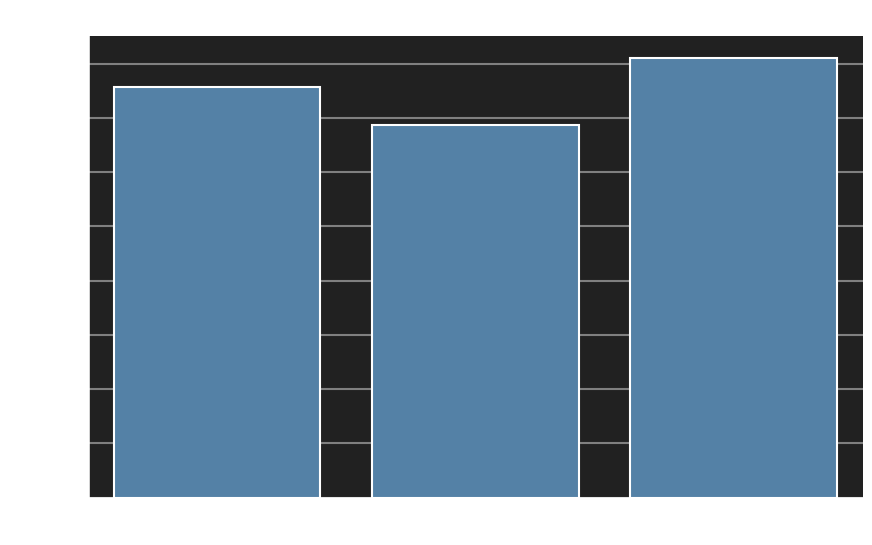

In [5]:
plot_with_custom_style(data, categorical_var='customer_term', dependent_var='average_tip', title='Average Tip by Customer Segment')